<a href="https://colab.research.google.com/github/shaimathamer/Data-anlysis/blob/main/diamond_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This File Analysis the diamonds price prediction according to their characteristic ,behind each some notes of the process

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import numpy as np


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
diamonds=pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [91]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [92]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


we discover there is index beside the dataframe index and that will make conflict so it is better to remove it 

In [93]:
diamonds.drop('Unnamed: 0', axis=1, inplace=True)

In [94]:
diamonds.cut.value_counts

<bound method IndexOpsMixin.value_counts of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object>

In [95]:
diamonds.describe()






,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


we got minumm value equal zero in columns x,y,z so it is better to replace it by non to use function drop 

In [96]:
 #diamonds[['x', 'y', 'z']].replace(np.nan,0,inplace=True)

no null values 

In [97]:
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
diamonds.shape

(53920, 10)

In [98]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds = diamonds.drop(['x', 'y', 'z'], axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93c0833ad0>,
      dtype=object)

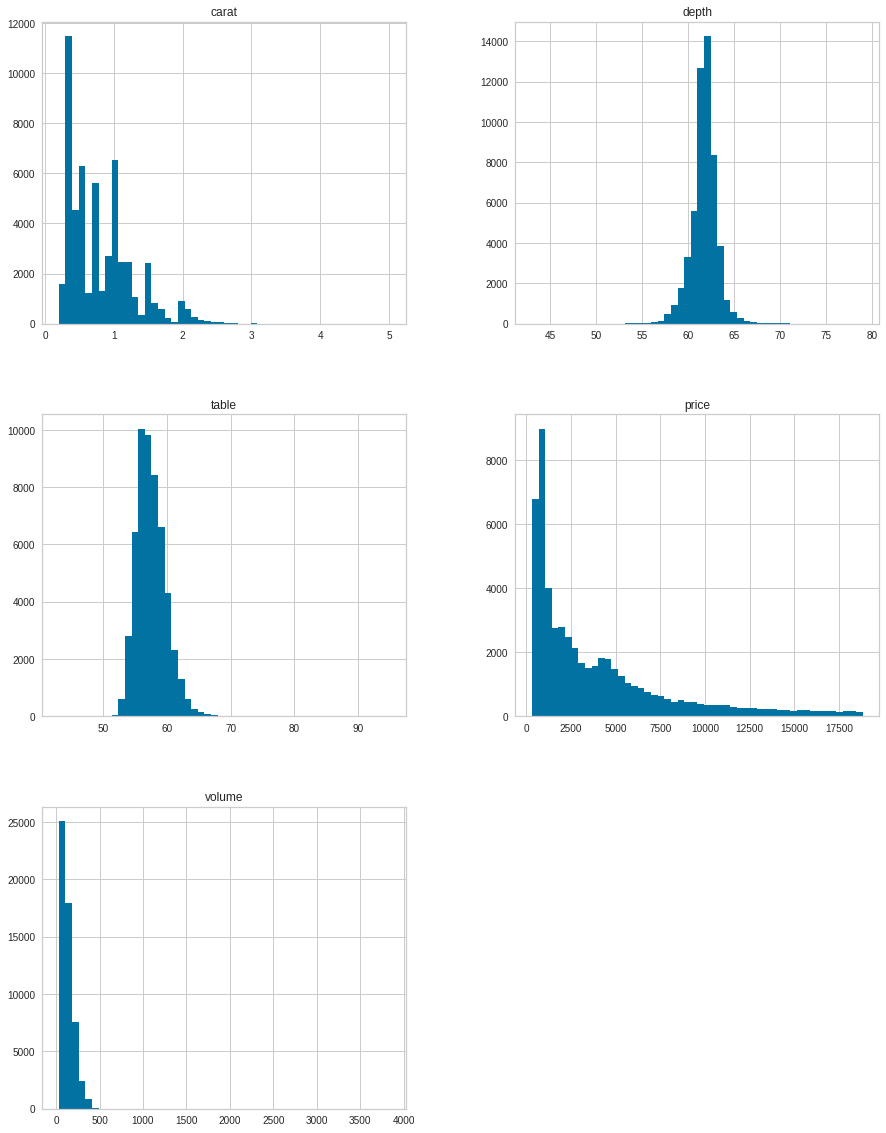

In [99]:
diamonds.hist(bins=50,figsize=(15,20))

lets go to price and see the outlier ,the price is left skewed 

> Indented block




In [100]:
max_thershold=diamonds['price'].quantile(.99)
diamonds['price']>max_thershold

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price, Length: 53920, dtype: bool

In [101]:
min_thershold=diamonds['price'].quantile(0.05)
min_thershold
diamonds[diamonds['price']<min_thershold]

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
50635,0.23,Very Good,F,VS2,61.0,59.0,402,38.140410
50636,0.23,Very Good,F,VS2,59.1,59.0,402,39.103746
50637,0.23,Very Good,F,VS2,61.6,59.0,402,38.808000
50638,0.23,Very Good,F,VS2,59.4,57.0,402,40.185068


In [102]:
#diamonds[(diamonds['price'] > min_thershold) & (diamonds['price'] < max_thershold)]
#diamonds.shape
#diamonds.price.hist()

In [103]:
mean_pr= diamonds['price'].mean()
stander_pr=diamonds.price.std()
upper_limit=mean_pr + 3*stander_pr
lower_limit=mean_pr- 3*stander_pr
diamonds=diamonds[(diamonds['price']<upper_limit) & (diamonds.price>lower_limit)]
diamonds

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


We can easily figure out that there is outlier that will effect in our module,i used 2 ways to discover it .

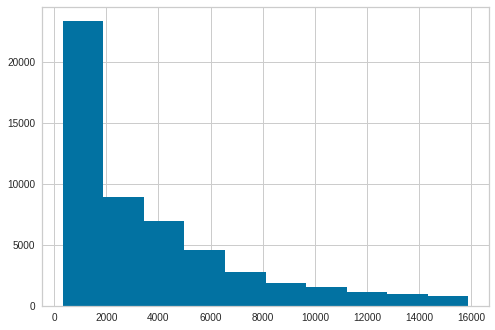

In [104]:
diamonds.price.hist()

NOW Visualtion 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


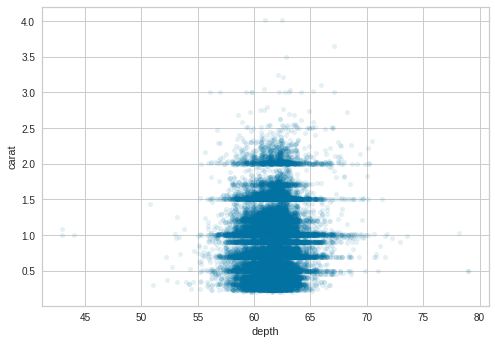

In [105]:
diamonds.plot(kind='scatter',x='depth',y='carat',alpha=0.1)


Looking for cooraltion 

In [106]:
diamonds['price']=diamonds['price'].astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
diamonds.price

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 52714, dtype: float64

In [108]:
matr_cor=diamonds.corr()

concolusion there is stronge relation between carat and price ,and x,y,z.in other side table has no meaning or relation ,this with numerical data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93bf6b1110>,
      dtype=object)

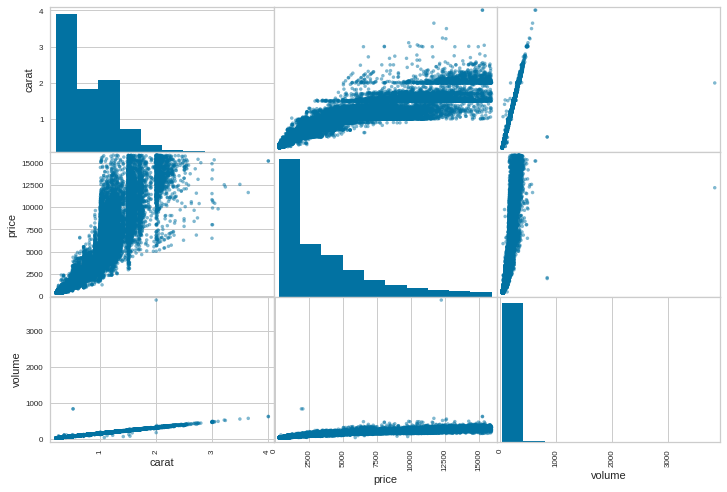

In [109]:
from pandas.plotting import scatter_matrix
attributes =['carat','price','volume']
scatter_matrix(diamonds[attributes ],figsize=(12, 8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


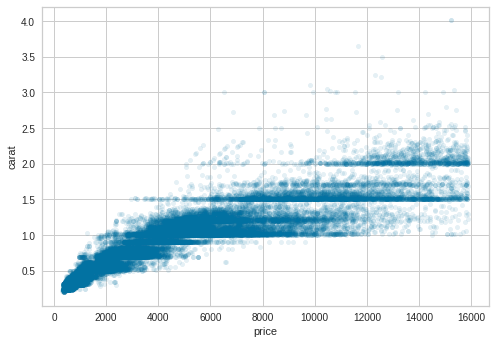

In [110]:
diamonds.plot(kind="scatter", x="price", y="carat",
alpha=0.1)

Finally we can say price is label ,and carat is an important attraibut 

In [111]:
diamonds=diamonds.drop('table',axis=1)

In [112]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
price      0
volume     0
dtype: int64

In [113]:
attt=['clarity','color','cut']
diamonds_numb=diamonds.drop(attt,axis=1)


In [114]:

#from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()
cat=diamonds[['clarity','color','cut']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
diamonds[['clarity','color','cut']]= ordinal_encoder.fit_transform(cat)

#dimond_cat= cat_encoder.fit_transform(cat)
diamonds['cut'].value_counts()
diamonds


,carat,cut,color,clarity,depth,price,volume
0,0.23,2.0,1.0,3.0,61.5,326.0,38.202030
1,0.21,3.0,1.0,2.0,59.8,326.0,34.505856
2,0.23,1.0,1.0,4.0,56.9,327.0,38.076885
3,0.29,3.0,5.0,5.0,62.4,334.0,46.724580
4,0.31,1.0,6.0,3.0,63.3,335.0,51.917250
...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,2757.0,115.920000
53936,0.72,1.0,0.0,2.0,63.1,2757.0,118.110175
53937,0.70,4.0,0.0,2.0,62.8,2757.0,114.449728
53938,0.86,3.0,4.0,3.0,61.0,2757.0,140.766120


In [115]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")
#imputer.fit(diamonds_numb)

#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#num_pipeline = Pipeline([
#('imputer', SimpleImputer(strategy="median")),
#('std_scaler', StandardScaler()),
#])
std_scaler = StandardScaler()
diamonds[['carat','depth','price','volume']]=std_scaler.fit_transform(diamonds[['carat','depth','price','volume']])


#housing_num_tr = num_pipeline.fit_transform(diamonds_numb)
diamonds


,carat,cut,color,clarity,depth,price,volume
0,-1.231654,2.0,1.0,3.0,-0.177671,-0.949408,-1.200172
1,-1.277285,3.0,1.0,2.0,-1.366283,-0.949408,-1.251054
2,-1.231654,1.0,1.0,4.0,-3.393913,-0.949120,-1.201895
3,-1.094759,3.0,5.0,5.0,0.451593,-0.947106,-1.082851
4,-1.049128,1.0,6.0,3.0,1.080858,-0.946819,-1.011368
...,...,...,...,...,...,...,...
53935,-0.113683,2.0,0.0,2.0,-0.667099,-0.249956,-0.130305
53936,-0.113683,1.0,0.0,2.0,0.941022,-0.249956,-0.100155
53937,-0.159314,4.0,0.0,2.0,0.731267,-0.249956,-0.150545
53938,0.205738,3.0,4.0,3.0,-0.527263,-0.249956,0.211728


In [116]:
label=diamonds.price.copy()
diamonds_x=diamonds.drop('price',axis=1)
diamonds_x


,carat,cut,color,clarity,depth,volume
0,-1.231654,2.0,1.0,3.0,-0.177671,-1.200172
1,-1.277285,3.0,1.0,2.0,-1.366283,-1.251054
2,-1.231654,1.0,1.0,4.0,-3.393913,-1.201895
3,-1.094759,3.0,5.0,5.0,0.451593,-1.082851
4,-1.049128,1.0,6.0,3.0,1.080858,-1.011368
...,...,...,...,...,...,...
53935,-0.113683,2.0,0.0,2.0,-0.667099,-0.130305
53936,-0.113683,1.0,0.0,2.0,0.941022,-0.100155
53937,-0.159314,4.0,0.0,2.0,0.731267,-0.150545
53938,0.205738,3.0,4.0,3.0,-0.527263,0.211728


categorical data

In [117]:
#from sklearn.compose import ColumnTransformer

#attt=['clarity','color','cut']
#diamonds_numb=diamonds.drop(attt,axis=1)
#cat=diamonds[['clarity','color','cut']]
#diamonds_numb= diamonds_numb.select_dtypes(include="object").columns
#cat=cat.select_dtypes(include="object").columns

#full_pipeline = ColumnTransformer([
#("num", num_pipeline, diamonds_numb),
#("catt", OrdinalEncoder(), cat),
#])





In [118]:
from sklearn.model_selection import train_test_split
train_set, test_set ,train_labels, test_labels= train_test_split(diamonds_x,label, test_size=0.2, random_state=42)

lets now deal with null values in numerical data first

Pipeline (fill null,and scalling)

In [119]:
#labelas = test_set['price'].copy()
#test_set_rdy = test_set.drop('price', axis = 1)
#test_set_rdy = test_set_rdy .select_dtypes(include="object").columns


Ok,now we can build model 

In [120]:
#diamonds_test_prepered= full_pipeline.fit_transform(test_set_rdy)


In [121]:
from sklearn import linear_model
lin_reg =linear_model.LinearRegression()
lin_reg.fit(train_set, train_labels)
lin_reg.score(test_set,test_labels)

0.8770319523727141

test the model

In [122]:
from sklearn.metrics import mean_squared_error
predic = lin_reg.predict(test_set)
MSE=mean_squared_error(test_labels,predic)
rmse = np.sqrt(MSE)
rmse

0.3466555693990994

In [123]:
from sklearn.metrics import r2_score

r2_score(test_labels,predic)

0.877031952372714

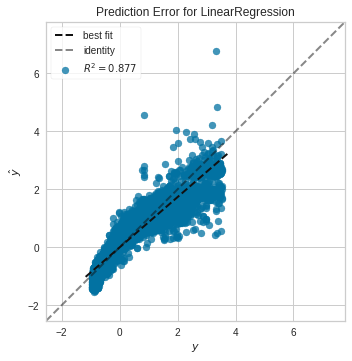

In [124]:
from yellowbrick.regressor import PredictionError

visuali = PredictionError(lin_reg)
visuali.fit(train_set, train_labels)
#diamonds_test_prepered= full_pipeline.fit_transform()
visuali.score(test_set, test_labels)
visuali.poof()

In [125]:
from sklearn.model_selection import cross_val_score
lin_reg_scores = cross_val_score(lin_reg, train_set, train_labels, scoring='neg_mean_squared_error', cv=10)
print('Cross-validation scores:', np.sqrt(-lin_reg_scores))

Cross-validation scores: [0.35438124 0.35418757 0.35887057 0.34765378 0.3469283  0.35687529
 0.36068719 0.35267809 0.34069794 0.4956134 ]


In [127]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set, train_labels)
tree_predictions = tree_reg.predict(test_set)
tree_reg.score(test_set,test_labels)

0.9691770027548265

In [128]:

MSE_t=mean_squared_error(test_labels,tree_predictions)
MSE_t=np.sqrt(MSE_t)
MSE_t



0.17355593790039583

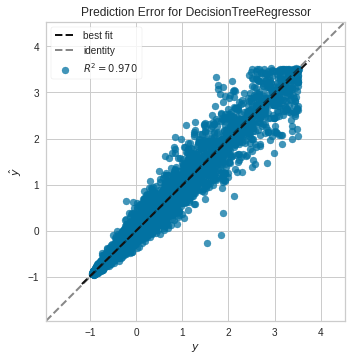

In [130]:
visuali = PredictionError(tree_reg)
visuali.fit(train_set, train_labels)
#diamonds_test_prepered= full_pipeline.fit_transform(test_set_rdy)
visuali.score(test_set, test_labels)
visuali.poof()

In [135]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_set, train_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
#scores.mean()
tree_rmse_scores

array([0.18043004, 0.18376509, 0.18474065, 0.16581352, 0.18477309,
       0.18076024, 0.18120821, 0.17174173, 0.17820717, 0.18404816])

In [136]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_set, train_labels)
forest_reg_test_predicted = forest_reg.predict(test_set)
forest_reg.score(test_set,test_labels)


0.9825351540498024

evalution

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [138]:
import inspect

param_grid = [{'n_estimators' : [3, 10, 30, 50, 100], 'min_samples_split' : [10, 40, 60, 100], 'max_features' : [2, 3, 4, 5, 6, 7, 8, 9] }]
forest_reg2 = RandomForestRegressor()
gridSearch = GridSearchCV(forest_reg2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', return_train_score = True)

In [140]:
gridSearch.fit(train_set, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [141]:
feat_imp = gridSearch.best_estimator_.feature_importances_
feat_imp

array([0.4732378 , 0.00235768, 0.0312057 , 0.07062437, 0.00472949,
       0.41784495])

After we run the evalution ,lets see what importamt features 

In [142]:
sorted(zip(feat_imp, diamonds.columns), reverse = True)

[(0.47323780271077537, 'carat'),
 (0.4178449525188551, 'price'),
 (0.07062436999708377, 'clarity'),
 (0.03120570374687563, 'color'),
 (0.004729487477509189, 'depth'),
 (0.002357683548900853, 'cut')]

In [143]:
final_model = gridSearch.best_estimator_

